In [1]:
%load_ext autoreload
%autoreload 2
import sympy as smp
import numpy as np
import scipy.special as sp

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color_names = ["windows blue",
               "red",
               "gold",
               "grass green"]
colors = sns.xkcd_palette(color_names)
sns.set_style("white")

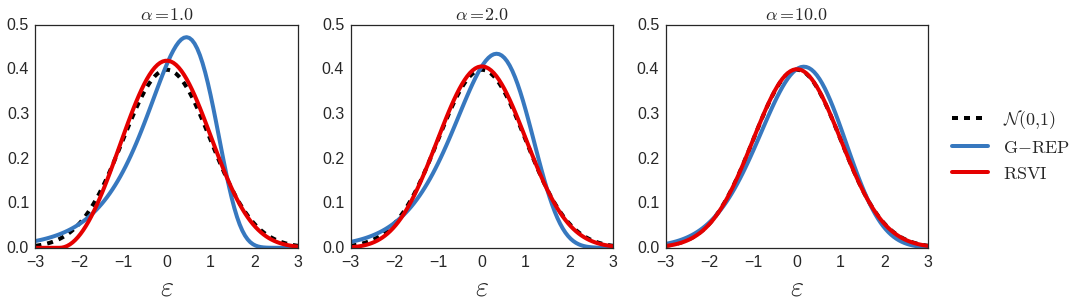

In [3]:
def logQ_grep(eps,alpha):
    sqrt_poly = np.sqrt(sp.polygamma(1,alpha))
    norm_const = 0.5*np.log(sp.polygamma(1,alpha)) + alpha*sp.digamma(alpha)-sp.gammaln(alpha)
    exp_term = np.exp(eps*sqrt_poly + sp.digamma(alpha))
    return eps*alpha*sqrt_poly - exp_term + norm_const

def derH_eps(eps,alpha):
    b = alpha-1./3.
    c = 1./np.sqrt(9.*b)
    v = 1.+eps*c
    
    return 3.*b*c*(v**2)

def fun_H(eps,alpha):
    b = alpha-1./3.
    c = 1./np.sqrt(9.*b)
    v = 1.+eps*c
    
    return b*v**3

def Q_rej(eps,alpha):
    b = alpha-1./3.
    c = np.sqrt(9.*b)
    norm_const = -sp.gammaln(alpha)
    Q = np.zeros_like(eps)
    t_1 = (alpha-1.)*np.log(fun_H(eps[eps>-c],alpha))
    t_2 = -fun_H(eps[eps>-c],alpha)+np.log(np.abs(derH_eps(eps[eps>-c],alpha)))
    Q[eps>-c] = np.exp(t_1+t_2+norm_const)
    return Q

alphas = [1.0,2.0,10.0]
epsilon = np.linspace(-3.,3.,100)

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot('131')
iter_ind = 0
for alpha in alphas:
    iter_ind += 1
    ax = fig.add_subplot('13'+str(iter_ind))
    ax.plot(epsilon,np.exp(-0.5*epsilon**2)/np.sqrt(2.*np.pi),'k--',lw=4, label='$\\mathcal{N}(0,1)$')
    ax.plot(epsilon,np.exp(logQ_grep(epsilon,alpha)),color=colors[0],lw=4, label='$\\mathrm{G-REP}$')
    if alpha < 1.:
        alpha_rej = alpha+1.
    else:
        alpha_rej = alpha
    ax.plot(epsilon,Q_rej(epsilon,alpha_rej),color = colors[1],lw=4, label='$\\mathrm{RSVI}$')
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)
    ax.set_xlabel("$\\varepsilon$", fontsize=28)
    ax.set_title('$\\mathbf{\\alpha} = '+str(alpha)+'$',fontsize=18)
    plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5], [0.0,0.1,0.2,0.3,0.4,0.5])
lgd = ax.legend(fontsize=18,bbox_to_anchor=(0.1, 0.6, 1.5, 0.102))
#plt.tight_layout()
filename = './compare_Qeps.pdf'
plt.savefig(filename, bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)